In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [126]:
df = {}

for i in range(2014, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] == 80].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] == 80].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편직업코드'] == 99].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편교육코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내교육코드'] == 9].index, inplace=True)

mandic = {1:10015,2:5011,3:4833,5:3325.5,6:2582,7:3510,8:3539,9:2494,13:0}
womandic = {1:8024,2:3136,3:3256,5:2119,6:2060,7:2156,8:2795,9:1897,13:0}

for i in range(2014,2022):
    df[i]['남편소득수준'] = df[i]['남편직업코드']
    df[i]['아내소득수준'] = df[i]['아내직업코드']
    
    for j in mandic.keys():
        df[i]['남편소득수준'].replace(j,mandic[j], inplace=True)
        df[i]['아내소득수준'].replace(j,mandic[j], inplace=True)

df[2019] = pd.concat([df[2014], df[2015], df[2016], df[2017], df[2018], df[2019], df[2020], df[2021]])

C:\Users\science7\AppData\Local\Temp\ipykernel_1236\2124785483.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_1236\2124785483.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_1236\2124785483.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_1236\2124785483.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [127]:
df[year].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737401 entries, 0 to 123107
Data columns (total 21 columns):
 #   Column    Dtype  
---  ------    -----  
 0   신고연도      int64  
 1   신고월       int64  
 2   신고일       int64  
 3   남편지역코드    int64  
 4   아내지역코드    int64  
 5   실제결혼연도    int64  
 6   실제결혼월     int64  
 7   남편직업코드    int64  
 8   아내직업코드    int64  
 9   남편교육코드    int64  
 10  아내교육코드    int64  
 11  남편결혼코드    int64  
 12  아내결혼코드    int64  
 13  남편연령      float64
 14  아내연령      float64
 15  남편국적구분코드  float64
 16  남편국적코드    object 
 17  아내국적구분코드  float64
 18  아내국적코드    object 
 19  남편소득수준    float64
 20  아내소득수준    float64
dtypes: float64(6), int64(13), object(2)
memory usage: 291.6+ MB


In [128]:
year = 2019
# 소득  (연속)

# 소득 차이 (연속)

# 여성결혼연령 (연속)



# 연상혼
df[year].loc[df[year]['남편연령'] < df[year]['아내연령'], "연상혼여부"] = 1
df[year].loc[df[year]['남편연령'] >= df[year]['아내연령'], "연상혼여부"] = 0

# 아내 대도시
df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내대도시여부"] = 1
df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내대도시여부"] = 0

# 남편 대도시
df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편대도시여부"] = 1
df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편대도시여부"] = 0

# 남자 결혼 종류

# 여자 결혼 종류

# 아내 초혼 여부
df[year].loc[df[year]['아내결혼코드'] == 1, "아내초혼여부"] = 1
df[year].loc[df[year]['아내결혼코드'] != 1, "아내초혼여부"]= 0

# 남편 초혼 여부
df[year].loc[df[year]['남편결혼코드'] == 1, "남편초혼여부"] = 1
df[year].loc[df[year]['남편결혼코드'] != 1, "남편초혼여부"]= 0

# 결혼 종류 차이 여부
df[year].loc[df[year]['남편초혼여부'] == df[year]['아내초혼여부'], "결혼종류차이여부"] = 1
df[year].loc[df[year]['남편초혼여부'] != df[year]['아내초혼여부'], "결혼종류차이여부"]= 0

# 강혼 유무
df[year].loc[df[year]['아내교육코드'] > df[year]['남편교육코드'], "강혼여부"] = 1
df[year].loc[df[year]['아내교육코드'] <= df[year]['남편교육코드'], "강혼여부"] = 0

# 소득 차
df[year]['소득차'] = df[year]['아내소득수준'] - df[year]['남편소득수준']

df[year]['아내연령제곱'] = df[year]['아내연령'] ** 2
df[year]['남편연령제곱'] = df[year]['남편연령'] ** 2

# 연상혼 유무
df[year].loc[df[year]['아내연령'] > df[year]['남편연령'], "연상혼여부"] = 1
df[year].loc[df[year]['아내연령'] <= df[year]['남편연령'], "연상혼여부"] = 0

# 아내 무직 여부
df[year].loc[df[year]['아내직업코드'] == 13, "아내무직여부"] = 1
df[year].loc[df[year]['아내직업코드'] != 13, "아내무직여부"] = 0

# 남편 무직 여부
df[year].loc[df[year]['남편직업코드'] == 13, "남편무직여부"] = 1
df[year].loc[df[year]['남편직업코드'] != 13, "남편무직여부"] = 0

df[year].loc[df[year]['남편지역코드'] == df[year]['아내지역코드'], "동일지역여부"] = 1
df[year].loc[df[year]['남편지역코드'] != df[year]['아내지역코드'], "동일지역여부"] = 0

df[year].loc[df[year]['아내교육코드'] == 4, "아내고졸여부"] = 1
df[year].loc[df[year]['아내교육코드'] != 4, "아내고졸여부"] = 0

df[year].loc[df[year]['아내교육코드'] == 5, "아내대졸여부"] = 1
df[year].loc[df[year]['아내교육코드'] != 5, "아내대졸여부"] = 0

df[year].loc[df[year]['아내교육코드'] == 6, "아내대학원졸여부"] = 1
df[year].loc[df[year]['아내교육코드'] != 6, "아내대학원졸여부"] = 0

df[year].loc[df[year]['아내지역코드'].isin([11, 23, 31]), "아내수도권여부"] = 1
df[year].loc[~df[year]['아내지역코드'].isin([11, 23, 31]), "아내수도권여부"] = 0

df[year].loc[df[year]['남편지역코드'].isin([11, 23, 31]), "남편수도권여부"] = 1
df[year].loc[~df[year]['남편지역코드'].isin([11, 23, 31]), "남편수도권여부"] = 0

df[year].loc[df[year]['실제결혼연도'] == 2015, "15년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2015, "15년여부"] = 0
df[year].loc[df[year]['실제결혼연도'] == 2016, "16년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2016, "16년여부"] = 0
df[year].loc[df[year]['실제결혼연도'] == 2017, "17년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2017, "17년여부"] = 0
df[year].loc[df[year]['실제결혼연도'] == 2018, "18년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2018, "18년여부"] = 0
df[year].loc[df[year]['실제결혼연도'] == 2019, "19년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2019, "19년여부"] = 0
df[year].loc[df[year]['실제결혼연도'] == 2020, "20년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2020, "20년여부"] = 0

df[year].loc[df[year]['실제결혼연도'] == 2021, "21년여부"] = 1
df[year].loc[df[year]['실제결혼연도'] != 2021, "21년여부"] = 0

woman_int_condition = (df[year]['남편국적구분코드'] == 1) & df[year]['아내국적구분코드'].isin([2,3])

# df[year].loc[woman_int_condition, "아내국제결혼여부"] = 1
# df[year].loc[~woman_int_condition, "아내국제결혼여부"] = 0


In [129]:
# ct = pd.crosstab(df[year]['아내국제결혼여부'], df[year]['강혼여부'])

# ct

### 출생코호트 -> 5년 단위
### 출생연도 기준 코호트 : 출생연도 계산 [실결혼연도 - 연령] -> 연령 올림후 연도에서 빼기

In [130]:
import math

df[year]['아내연령올림'] = df[year]['아내연령'].apply(np.ceil)

df[year]['아내출생연도'] = df[year]['실제결혼연도'] - df[year]['아내연령올림']


In [131]:
#아내 출생코호트

min = 1970
step = 5
for y in range (1970, 2000, step):
    df[year].loc[df[year]['아내출생연도'].between(y, y + 5), "아내코호트"] = f"{y} to {y + 5}" 

for code in df[year]['아내코호트'].unique():
    df[year].loc[df[year]['아내코호트'] == code, str(code) + " (아내)"] = 1
    df[year].loc[df[year]['아내코호트'] != code, str(code) + " (아내)"] = 0



In [132]:
df[year].drop(axis = 1, labels='nan (아내)', inplace=True)

In [133]:
#남편 출생연도
import math

df[year]['남편연령올림'] = df[year]['남편연령'].apply(np.ceil)

df[year]['남편출생연도'] = df[year]['실제결혼연도'] - df[year]['남편연령올림']

#남편 출생코호트

min = 1970
step = 5

for y in range (1970, 2000, step):
    df[year].loc[df[year]['남편출생연도'].between(y, y + 5), "남편코호트"] = f"{y} to {y + 5}" 

for code in df[year]['남편코호트'].unique():
    df[year].loc[df[year]['남편코호트'] == code, str(code) + " (남편)"] = 1
    df[year].loc[df[year]['남편코호트'] != code, str(code) + " (남편)"] = 0

In [134]:
df[year].drop(axis = 1, labels='nan (남편)', inplace=True)

In [135]:
features = df[year][['동일지역여부','남편무직여부','아내무직여부','연상혼여부','아내연령제곱',
'아내대도시여부','남편대도시여부', '아내고졸여부', '아내대졸여부', '아내대학원졸여부', '아내수도권여부','아내연령',
 '1970 to 1975 (아내)','1975 to 1980 (아내)','1980 to 1985 (아내)', '1985 to 1990 (아내)','1990 to 1995 (아내)','1995 to 2000 (아내)', '15년여부', '16년여부', '17년여부', '18년여부', '19년여부', '20년여부', '21년여부',
'1970 to 1975 (남편)', '1975 to 1980 (남편)','1980 to 1985 (남편)','1985 to 1990 (남편)','1990 to 1995 (남편)','1995 to 2000 (남편)']]
hypogamy = df[year]['강혼여부']
scaler = StandardScaler()
features = scaler.fit_transform(features)
model = sm.Logit(hypogamy,features)
results = model.fit()
print("aic : " + results.aic.__str__())
print('강혼으로 로지스틱 회귀분석')
print(results.summary(xname=['동일지역여부','남편무직여부','아내무직여부','연상혼여부','아내연령제곱',
'아내대도시여부','남편대도시여부', '아내고졸여부', '아내대졸여부', '아내대학원졸여부', '아내수도권여부',  '아내연령',
 '1970 to 1975 (아내)','1975 to 1980 (아내)','1980 to 1985 (아내)', '1985 to 1990 (아내)','1990 to 1995 (아내)','1995 to 2000 (아내)', '15년여부', '16년여부', '17년여부', '18년여부', '19년여부', '20년여부', '21년여부',
'1970 to 1975 (남편)', '1975 to 1980 (남편)','1980 to 1985 (남편)','1985 to 1990 (남편)','1990 to 1995 (남편)','1995 to 2000 (남편)']))

# features = df[year][['동일지역 여부','남편 무직 여부','아내 무직 여부','연상혼 여부','아내연령제곱','소득차','결혼종류 차이 유무','아내 초혼 여부','남편 초혼 여부',
# '아내 대도시 유무','남편 대도시 유무','남편소득수준','아내소득수준', '아내연령', '남편연령', '남편연령제곱', 
# '1970 to 1975 (아내)','1975 to 1980 (아내)','1980 to 1985 (아내)', '1985 to 1990 (아내)','1990 to 1995 (아내)','1995 to 2000 (아내)',
# '1970 to 1975 (남편)', '1975 to 1980 (남편)','1980 to 1985 (남편)','1985 to 1990 (남편)','1990 to 1995 (남편)','1995 to 2000 (남편)']]

Optimization terminated successfully.
         Current function value: 0.632709
         Iterations 7
aic : 2198601.3680619467
강혼으로 로지스틱 회귀분석
                           Logit Regression Results                           
Dep. Variable:                   강혼여부   No. Observations:              1737401
Model:                          Logit   Df Residuals:                  1737370
Method:                           MLE   Df Model:                           30
Date:                Tue, 16 Aug 2022   Pseudo R-squ.:                 -0.3715
Time:                        16:58:05   Log-Likelihood:            -1.0993e+06
converged:                       True   LL-Null:                   -8.0149e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
동일지역여부                0.0329      0.002     20.045    

In [136]:
features = df[year][['동일지역여부','남편무직여부','아내무직여부','연상혼여부','아내연령제곱',
'아내대도시여부','남편대도시여부', '아내고졸여부', '아내대졸여부', '아내대학원졸여부', '아내수도권여부',  '아내연령',
 '15년여부', '16년여부', '17년여부', '18년여부', '19년여부', '20년여부', '21년여부']]
hypogamy = df[year]['강혼여부']
scaler = StandardScaler()
features = scaler.fit_transform(features)
model = sm.Logit(hypogamy,features)
results = model.fit()
print("aic : " + results.aic.__str__())
print('강혼으로 로지스틱 회귀분석')
print(results.summary(xname=['동일지역여부','남편무직여부','아내무직여부','연상혼여부','아내연령제곱',
'아내대도시여부','남편대도시여부', '아내고졸여부', '아내대졸여부', '아내대학원졸여부', '아내수도권여부',  '아내연령',
 '15년여부', '16년여부', '17년여부', '18년여부', '19년여부', '20년여부', '21년여부']))

Optimization terminated successfully.
         Current function value: 0.635441
         Iterations 7
aic : 2208070.4722326174
강혼으로 로지스틱 회귀분석
                           Logit Regression Results                           
Dep. Variable:                   강혼여부   No. Observations:              1737401
Model:                          Logit   Df Residuals:                  1737382
Method:                           MLE   Df Model:                           18
Date:                Tue, 16 Aug 2022   Pseudo R-squ.:                 -0.3775
Time:                        16:58:17   Log-Likelihood:            -1.1040e+06
converged:                       True   LL-Null:                   -8.0149e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
동일지역여부         0.0253      0.002     15.639      0.000       0.022  

In [137]:
older_marriage_df = df[year][df[year]['연상혼여부']  == 1]

##### 아내 수도권 vs 비수도권 -> 연상혼

In [138]:
metropolitan = pd.crosstab(df[year]['아내수도권여부'], df[year]['연상혼여부'],normalize='all')

In [139]:
metropolitan

연상혼여부,0.0,1.0
아내수도권여부,,
0.0,0.378892,0.120398
1.0,0.371252,0.129458


<AxesSubplot:xlabel='연상혼여부', ylabel='아내수도권여부'>

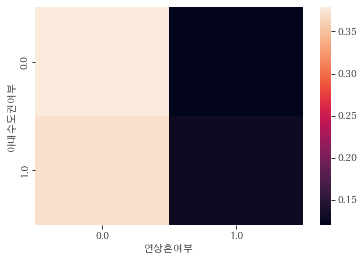

In [140]:
sns.heatmap(metropolitan)

##### 남편 수도권 vs 비수도권 -> 연상혼

In [141]:
metropolitan = pd.crosstab(df[year]['남편수도권여부'], df[year]['연상혼여부'],normalize='all')

metropolitan

연상혼여부,0.0,1.0
남편수도권여부,,
0.0,0.366378,0.122839
1.0,0.383766,0.127017


<AxesSubplot:xlabel='연상혼여부', ylabel='남편수도권여부'>

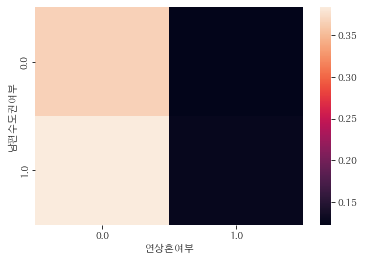

In [142]:
sns.heatmap(metropolitan)

##### 강혼 <-> 연상혼 (모델 x, 따로)

In [143]:
hypogamy = pd.crosstab(df[year]['강혼여부'], df[year]['연상혼여부'],normalize='all')

In [144]:
hypogamy

연상혼여부,0.0,1.0
강혼여부,,
0.0,0.626588,0.199961
1.0,0.123556,0.049895


<AxesSubplot:xlabel='연상혼여부', ylabel='강혼여부'>

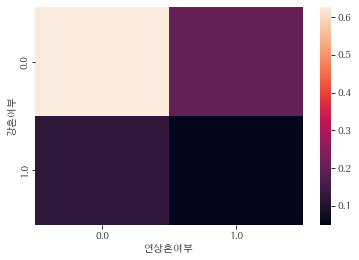

In [145]:
sns.heatmap(hypogamy)

##### 연상혼 <-> 지역차

In [146]:
pd.crosstab(df[year]['동일지역여부'], df[year]['연상혼여부'], normalize='all')


연상혼여부,0.0,1.0
동일지역여부,,
0.0,0.211940,0.064425
1.0,0.538204,0.185431


##### 여성 학력과 연상혼

In [147]:
older_marriage_df.loc[:, ['아내고졸여부', '아내대졸여부', '아내대학원졸여부']].value_counts() / len(older_marriage_df)

아내고졸여부  아내대졸여부  아내대학원졸여부
0.0     1.0     0.0         0.618678
1.0     0.0     0.0         0.266669
0.0     0.0     1.0         0.077035
                0.0         0.037618
dtype: float64

In [148]:
len(df[year][(df[year]['아내고졸여부'] == 1) & (df[year]['연상혼여부'] == 1)]) / len(df[year]['아내고졸여부'])

0.06662883237663614

In [149]:
len(df[year][(df[year]['아내대졸여부'] == 1) & (df[year]['연상혼여부'] == 1)]) / len(df[year]['아내대졸여부'])

0.15458031853325743

In [150]:
len(df[year][(df[year]['아내대학원졸여부'] == 1) & (df[year]['연상혼여부'] == 1)]) / len(df[year]['아내대학원졸여부'])

0.019247715409395988

##### 결혼 종류와 연상혼

In [151]:
pd.crosstab(older_marriage_df['남편초혼여부'], older_marriage_df['아내초혼여부'], normalize='all')

아내초혼여부,0.0,1.0
남편초혼여부,,
0.0,0.105006,0.022347
1.0,0.098758,0.773889


##### 연상혼 중 수도권 비율

In [152]:
pd.crosstab(older_marriage_df['아내수도권여부'], older_marriage_df['남편수도권여부'], normalize='all')

# 남편이나 아내 중 한 명만 수도권 거주 -> 거의 없음
# 둘다 수도권 거주 or 둘다 수도권 비거주

남편수도권여부,0.0,1.0
아내수도권여부,,
0.0,0.439235,0.042635
1.0,0.052405,0.465724


##### 수도권 / 비수도권 전체 비율

In [153]:
metropolitan = df[year][(df[year]['아내수도권여부'] == 1) | (df[year]['남편수도권여부'] == 1)]


In [154]:
len(metropolitan) / len(df[year])

# 전체 결혼건 수 대비 남편이나 아내 중 1인 이상 수도권 거주 비율 약 55%

0.5545156241995947

In [155]:
metropolitan = df[year][(df[year]['아내수도권여부'] == 1) & (df[year]['남편수도권여부'] == 1)]

In [156]:
len(metropolitan) / len(df[year])

# 전체 결혼건 수 대비 남편이나 아내 둘 다 수도권 거주 비율 약 45%

0.4569768291833607

##### 아내 연령대에 따른 연상혼 비율

In [157]:
step = 5
min = 20
max = 35

for i in range(min, max, step):
    df[year].loc[df[year]['아내연령'].between(i, i + step), "아내연령대"] = str(i) + " ~ " + str(i + step - 1) + "세"

df[year].loc[df[year]['아내연령'] >= max, "아내연령대"] = str(max) + "세 이상"
df[year].loc[df[year]['아내연령'] < min, "아내연령대"] = str(min) + "세 미만"

In [158]:
df[year][df[year]['연상혼여부'] == 1]['아내연령대'].value_counts().sort_index() / len(df[year][df[year]['연상혼여부'] == 1])

# 연상혼 건수 중 30 ~34세 여성이 약 38%의 비중을 차지

20 ~ 24세    0.025379
20세 미만      0.002163
25 ~ 29세    0.238461
30 ~ 34세    0.388641
35세 이상      0.345356
Name: 아내연령대, dtype: float64

##### 남성 연령대에 따른 연상혼 비율

In [159]:
step = 5
min = 20
max = 35

for i in range(min, max, step):
    df[year].loc[df[year]['남편연령'].between(i, i + step), "남편연령대"] = str(i) + " ~ " + str(i + step - 1) + "세"

df[year].loc[df[year]['남편연령'] >= max, "남편연령대"] = str(max) + "세 이상"
df[year].loc[df[year]['남편연령'] < min, "남편연령대"] = str(min) + "세 미만"

In [160]:
df[year][df[year]['연상혼여부'] == 1]['남편연령대'].value_counts().sort_index() / len(df[year][df[year]['연상혼여부'] == 1])

# 연상혼 건수 중 25 ~29세 여성이 약 35%의 비중을 차지

20 ~ 24세    0.048924
20세 미만      0.004563
25 ~ 29세    0.355609
30 ~ 34세    0.338604
35세 이상      0.252299
Name: 남편연령대, dtype: float64

##### 소득차 관계와 연상혼

In [161]:
df[year].loc[df[year]['아내소득수준'] > df[year]['남편소득수준'], "소득차관계"] = "아내 > 남편"
df[year].loc[df[year]['아내소득수준'] == df[year]['남편소득수준'], "소득차관계"] = "아내 == 남편"
df[year].loc[df[year]['아내소득수준'] < df[year]['남편소득수준'], "소득차관계"] = "아내 < 남편"

older_marriage_df.loc[older_marriage_df['아내소득수준'] > older_marriage_df['남편소득수준'], "소득차관계"] = "아내 > 남편"
older_marriage_df.loc[older_marriage_df['아내소득수준'] == older_marriage_df['남편소득수준'], "소득차관계"] = "아내 == 남편"
older_marriage_df.loc[older_marriage_df['아내소득수준'] < older_marriage_df['남편소득수준'], "소득차관계"] = "아내 < 남편"

C:\Users\science7\AppData\Local\Temp\ipykernel_1236\2309250720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  older_marriage_df.loc[older_marriage_df['아내소득수준'] > older_marriage_df['남편소득수준'], "소득차관계"] = "아내 > 남편"


In [162]:
older_marriage_df['소득차관계'].value_counts() / len(older_marriage_df)

아내 < 남편     0.420219
아내 == 남편    0.380908
아내 > 남편     0.198874
Name: 소득차관계, dtype: float64

##### 교육수준차